importing the dependencies

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [7]:
import sklearn.datasets

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
from xgboost import XGBRegressor

In [10]:
from sklearn import metrics
from sklearn import set_config
set_config(display="text")  # Disable HTML rendering


importing the boston house_price dataset

In [11]:
house_price_dataset=sklearn.datasets.fetch_california_housing()

In [12]:
print(house_price_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]], shape=(20640, 8)), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset

loading the dataset to pandas dataframe

In [13]:
house_price_dataframe=pd.DataFrame(house_price_dataset.data,columns=house_price_dataset.feature_names)

In [14]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


add the target(price) to column dataset

In [15]:
house_price_dataframe['price']= house_price_dataset.target

In [16]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [17]:
house_price_dataframe.shape

(20640, 9)

In [18]:
#checking missing values
house_price_dataframe.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [19]:
#statistical mesures of the dataset
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


understanding the correlation between various features in the dataset

1.possitive correlation
2.negative correlation

In [20]:
correlation=house_price_dataframe.corr()

<Axes: >

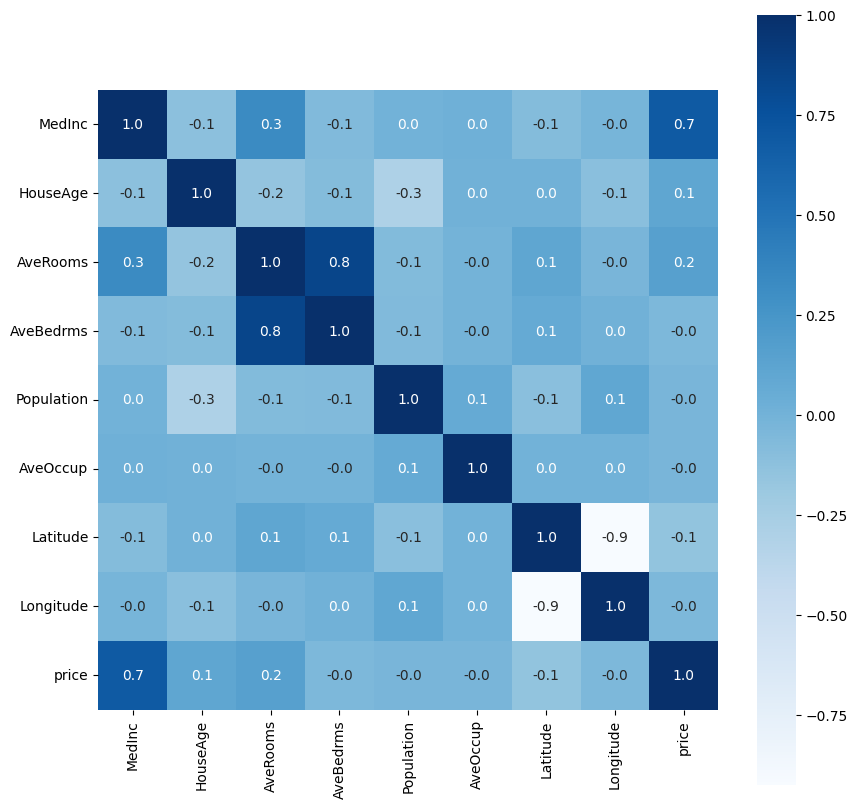

In [21]:

#constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Blues')
# cbar for the bar which is on right side
#fmt is for how many float values do we want bascially how many decimal values we want fter decimal 
#annot is for notations on left side like medinc,houseage etc
#annot_kws size if for size of the text written inside the box
#cmap is for the color of the heapmap





splitting the data and target 

In [22]:
x=house_price_dataframe.drop(['price'],axis=1)
#axis=1 for dropping a column and axis=0 for dropping a row
y=house_price_dataframe['price']
#storing values of price column in y
print(x)
print(y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

splitting the data into training data and test data

In [23]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2,random_state=2)
#0.2 means 20% of data would be test data and 80% of data would be training data

In [24]:
print(x.shape,x_train.shape,x_test.shape)

(20640, 8) (16512, 8) (4128, 8)


model training

XGboost Regressor

In [25]:
#loading the model
model=XGBRegressor()

In [26]:
#training the model with x_train
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

evaluation

prediction on training data

In [27]:
#accuracy for prediction on traning data
training_data_prediction=model.predict(x_train)

In [28]:
print(training_data_prediction)

[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]


In [29]:
# R squared error
score_1 = metrics.r2_score(y_train,training_data_prediction)
#mean absolute error
score_2 = metrics.mean_absolute_error(y_train,training_data_prediction)

print("R squared error : ", score_1)
print("mean absolute error : ", score_2)


R squared error :  0.943650140819218
mean absolute error :  0.1933648700612105


prediction on test data

visualizing the actual price and predicted prices

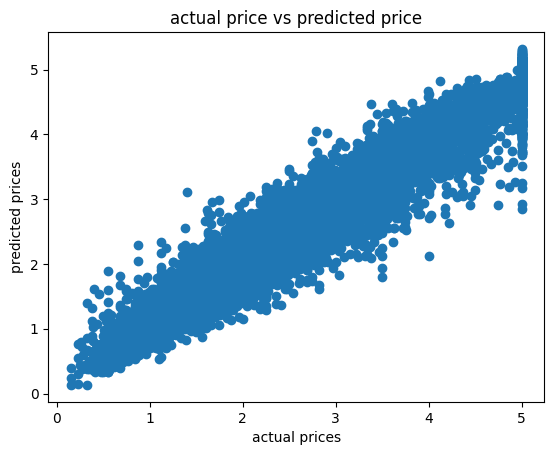

In [30]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("actual prices")
plt.ylabel("predicted prices")
plt.title("actual price vs predicted price")
plt.show()

In [31]:
#accuracy for prediction on test data
test_data_prediction=model.predict(x_test)

In [32]:
# R squared error
score_1 = metrics.r2_score(y_test,test_data_prediction)
#mean absolute error
score_2 = metrics.mean_absolute_error(y_test,test_data_prediction)

print("R squared error : ", score_1)
print("mean absolute error : ", score_2)


R squared error :  0.8338000331788725
mean absolute error :  0.3108631800268186


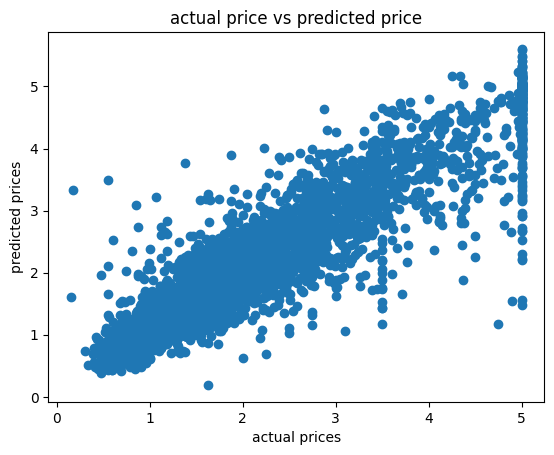

In [33]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("actual prices")
plt.ylabel("predicted prices")
plt.title("actual price vs predicted price")
plt.show()